# Los Angeles - Crime Analysis

### Project 1
### Group 5
1. Meghana Sreenivasa Rao (002331855)
2. Saee Hemant Majlekar
3. Somya Padhy

*Submitted to: Sivarit Sultornsanee*

*Submission Date: October 15th, 2024*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Data Acquisition

In [4]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')  #loading the dataset

In [6]:
df.shape

(982638, 28)

### Data Inspection

In [9]:
df.head(5)  #to display the first 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [11]:
df.dtypes  #checking the datatypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [13]:
print('The columns are: ', df.columns)  #reviewing the column names

The columns are:  Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


### Data Cleaning

### Handling missing values

In [17]:
df.isnull().sum()  #to check for missing values

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145262
Vict Age               0
Vict Sex          138445
Vict Descent      138456
Premis Cd             14
Premis Desc          585
Weapon Used Cd    656471
Weapon Desc       656471
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          913763
Crm Cd 3          980327
Crm Cd 4          982574
LOCATION               0
Cross Street      830789
LAT                    0
LON                    0
dtype: int64

In [19]:
df.shape

(982638, 28)

In [21]:
#replacing missing values with mode to get a comprehensive dataset
df['Mocodes'] = df['Mocodes'].fillna(df['Mocodes'].mode().iloc[0] if not df['Mocodes'].mode().empty else None)
df['Vict Sex'] = df['Vict Sex'].fillna(df['Vict Sex'].mode().iloc[0] if not df['Vict Sex'].mode().empty else None)
df['Vict Descent'] = df['Vict Descent'].fillna(df['Vict Descent'].mode().iloc[0] if not df['Vict Descent'].mode().empty else None)
df['Premis Desc'] = df['Premis Desc'].fillna(df['Premis Desc'].mode().iloc[0] if not df['Premis Desc'].mode().empty else None)
df['Weapon Desc'] = df['Weapon Desc'].fillna(df['Weapon Desc'].mode().iloc[0] if not df['Weapon Desc'].mode().empty else None)
df['Status'] = df['Status'].fillna(df['Status'].mode().iloc[0] if not df['Status'].mode().empty else None)
df['Cross Street'] = df['Cross Street'].fillna(df['Cross Street'].mode().iloc[0] if not df['Cross Street'].mode().empty else None)

In [22]:
df['Premis Cd']

0         101.0
1         128.0
2         502.0
3         405.0
4         102.0
          ...  
982633    207.0
982634    101.0
982635    503.0
982636    102.0
982637    108.0
Name: Premis Cd, Length: 982638, dtype: float64

In [25]:
#replacing missing values with the mean
df['Premis Cd'] = df['Premis Cd'].fillna(df['Premis Cd'].mean())
df['Weapon Used Cd'] = df['Weapon Used Cd'].fillna(df['Weapon Used Cd'].mean())
df['Crm Cd 1'] = df['Crm Cd 1'].fillna(df['Crm Cd 1'].mean())
df['Crm Cd 2'] = df['Crm Cd 2'].fillna(df['Crm Cd 2'].mean())
df['Crm Cd 3'] = df['Crm Cd 3'].fillna(df['Crm Cd 3'].mean())
df['Crm Cd 4'] = df['Crm Cd 4'].fillna(df['Crm Cd 4'].mean())

In [27]:
df.isnull().sum() #to check for furthur remaining missing values

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

### Duplicate Rows

In [30]:
df.duplicated().sum()

0

### Converting Data Types

In [33]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [35]:
df = df.astype({'Premis Cd': int})
df = df.astype({'Weapon Used Cd' : int})
df = df.astype({'Crm Cd 1' : int})
df = df.astype({'Crm Cd 2' : int})
df = df.astype({'Crm Cd 3' : int})
df = df.astype({'Crm Cd 4' : int})
df = df.astype({'LAT': int})
df = df.astype({'LON': int})

In [37]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce').fillna('1900-01-01')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce').fillna('1900-01-01')

# df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y', errors='coerce').fillna('1900-01-01')
# df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y', errors='coerce').fillna('1900-01-01')


C:\Users\megha\AppData\Local\Temp\ipykernel_14916\2340869280.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], errors='coerce').fillna('1900-01-01')
C:\Users\megha\AppData\Local\Temp\ipykernel_14916\2340869280.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce').fillna('1900-01-01')


In [39]:
df.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                  int32
Premis Desc               object
Weapon Used Cd             int32
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                   int32
Crm Cd 2                   int32
Crm Cd 3                   int32
Crm Cd 4                   int32
LOCATION                  object
Cross Street              object
LAT                        int32
LON                        int32
dtype: object

In [42]:
df['AREA NAME'].head(20)

0        Wilshire
1         Central
2       Southwest
3        Van Nuys
4       Hollywood
5       Southeast
6         Central
7       Southwest
8          Newton
9         Mission
10      Southeast
11        Mission
12        Rampart
13    West Valley
14      Southwest
15      Southeast
16         Newton
17       Wilshire
18    West Valley
19       Wilshire
Name: AREA NAME, dtype: object

### Dealing with Outliers

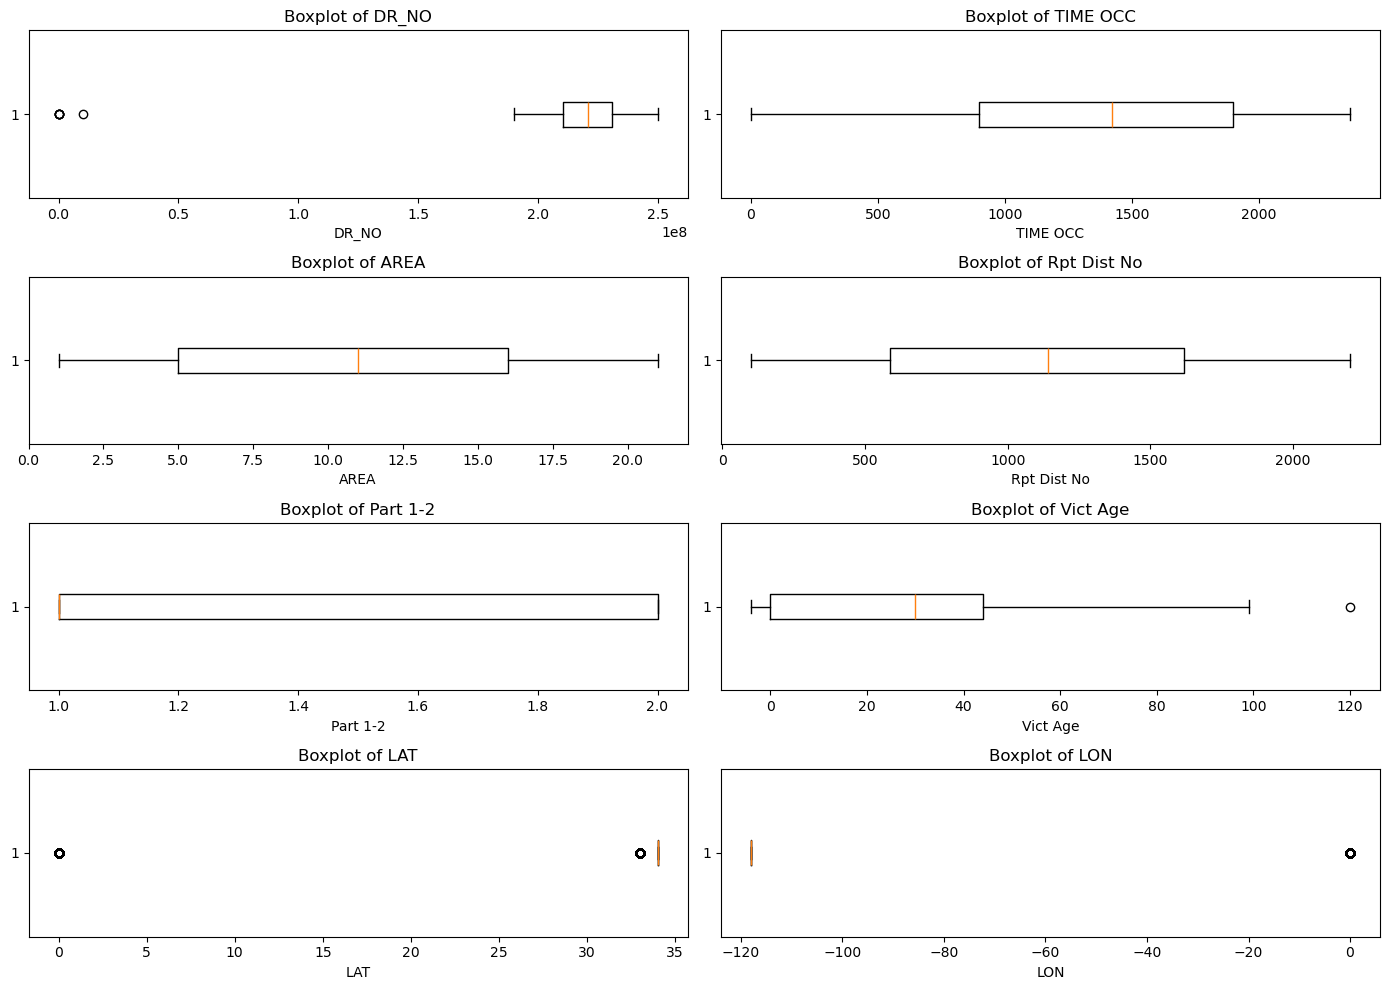

In [49]:
# Identify integer columns

int_columns = ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Vict Age','LAT','LON']

# Create boxplots for all integer columns
plt.figure(figsize=(14, 10))
for i, column in enumerate(int_columns, 1):
    plt.subplot(4, 2, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

We can conclude that there are outliers in victim age, LAT and LON columns.

C:\Users\megha\AppData\Local\Temp\ipykernel_14916\1901117288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_filtered['LAT_zscore'] = np.abs(stats.zscore(crime_data_filtered['LAT'].dropna()))
C:\Users\megha\AppData\Local\Temp\ipykernel_14916\1901117288.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_filtered['LON_zscore'] = np.abs(stats.zscore(crime_data_filtered['LON'].dropna()))


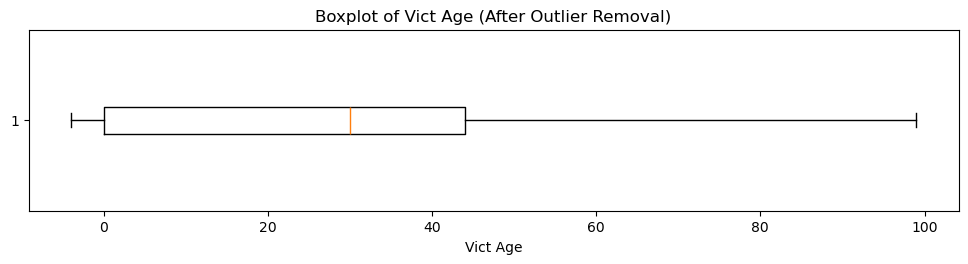

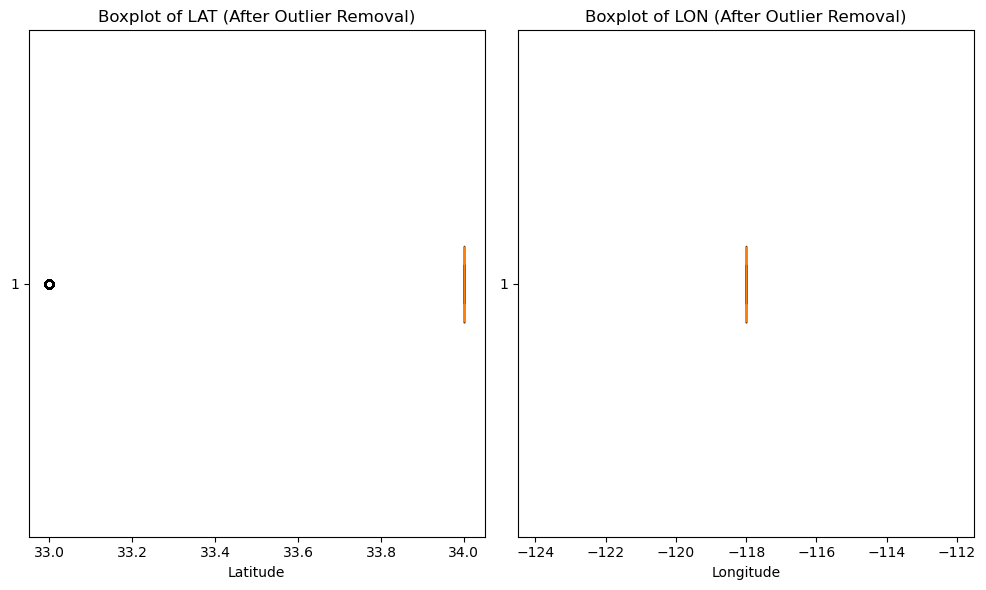

In [57]:
from scipy import stats
# Define a reasonable upper limit for 'Vict Age'
age_threshold = 100

crime_data_filtered = df[df['Vict Age'] <= age_threshold]

crime_data_filtered['LAT_zscore'] = np.abs(stats.zscore(crime_data_filtered['LAT'].dropna()))
crime_data_filtered['LON_zscore'] = np.abs(stats.zscore(crime_data_filtered['LON'].dropna()))
z_threshold = 3
crime_data_filtered = crime_data_filtered[
    (crime_data_filtered['LAT_zscore'] < z_threshold) & 
    (crime_data_filtered['LON_zscore'] < z_threshold)
]

crime_data_filtered = crime_data_filtered.drop(columns=['LAT_zscore', 'LON_zscore'])

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.boxplot(crime_data_filtered['Vict Age'].dropna(), vert=False)
plt.title('Boxplot of Vict Age (After Outlier Removal)')
plt.xlabel('Vict Age')
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(crime_data_filtered['LAT'].dropna(), vert=False)
plt.title('Boxplot of LAT (After Outlier Removal)')
plt.xlabel('Latitude')

plt.subplot(1, 2, 2)
plt.boxplot(crime_data_filtered['LON'].dropna(), vert=False)
plt.title('Boxplot of LON (After Outlier Removal)')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

In [61]:
df1 = crime_data_filtered.copy() #cleaned dataset that will be used for visualization

### Encoding Categorical Data

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AREA NAME'] = le.fit_transform(df['AREA NAME'])

In [66]:
df['Crm Cd Desc'] = le.fit_transform(df['Crm Cd Desc'])
df['Mocodes'] = le.fit_transform(df['Mocodes'])
df['Vict Sex'] = le.fit_transform(df['Vict Sex'])
df['Vict Descent'] = le.fit_transform(df['Vict Descent'])
df['Premis Desc'] = le.fit_transform(df['Premis Desc'])
df['Weapon Desc'] = le.fit_transform(df['Weapon Desc'])
df['Status'] = le.fit_transform(df['Status'])
df['Status Desc'] = le.fit_transform(df['Status Desc'])
df['LOCATION'] = le.fit_transform(df['LOCATION'])
df['Cross Street'] = le.fit_transform(df['Cross Street'])

In [68]:
df.shape


(982638, 28)

In [69]:
df.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                  int32
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc                int32
Mocodes                    int32
Vict Age                   int64
Vict Sex                   int32
Vict Descent               int32
Premis Cd                  int32
Premis Desc                int32
Weapon Used Cd             int32
Weapon Desc                int32
Status                     int32
Status Desc                int32
Crm Cd 1                   int32
Crm Cd 2                   int32
Crm Cd 3                   int32
Crm Cd 4                   int32
LOCATION                   int32
Cross Street               int32
LAT                        int32
LON                        int32
dtype: object

In [70]:
x = df['Date Rptd']

In [71]:
y = df['DATE OCC']

In [72]:
z = df['TIME OCC']

In [73]:
date_time = pd.concat([x,y],axis = 1)

In [74]:
date_times = pd.concat([date_time,z] , axis = 1) #combining date time data

In [75]:
date_times

,Date Rptd,DATE OCC,TIME OCC
0,2020-03-01,2020-03-01,2130
1,2020-02-09,2020-02-08,1800
2,2020-11-11,2020-11-04,1700
3,2023-05-10,2020-03-10,2037
4,2022-08-18,2020-08-17,1200
...,...,...,...
982633,2024-08-20,2024-08-17,2300
982634,2024-07-24,2024-07-23,1400
982635,2024-01-15,2024-01-15,100
982636,2024-04-24,2024-04-24,1500


In [76]:
without_date_time = df.copy()

In [77]:
without_date_time = without_date_time.drop('Date Rptd' , axis = 1) #columns relating to date and time are removed to exclude from furthur analysis

In [78]:
without_date_time = without_date_time.drop('DATE OCC' , axis = 1)

In [79]:
without_date_time = without_date_time.drop('DR_NO' , axis=1)

In [80]:
without_date_time = without_date_time.drop('TIME OCC' , axis=1)

In [81]:
without_date_time.head(5)

,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,7,20,784,1,510,134,37961,0,3,12,...,0,0,510,998,984,991,21599,1610,34,-118
1,1,1,182,1,330,21,268374,47,3,12,...,3,2,330,998,984,991,1856,1610,34,-118
2,3,15,356,1,480,11,48902,19,4,18,...,3,2,480,958,984,991,13315,1610,34,-118
3,9,17,964,1,343,106,15487,19,3,12,...,3,2,343,958,984,991,13512,1610,34,-118
4,6,6,666,2,354,116,269901,28,3,7,...,3,2,354,958,984,991,21439,1610,34,-118


### Standardize or Normalize Numerical Data 

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(without_date_time)

StandardScaler()

In [84]:
standardized = scaler.transform(without_date_time)

In [85]:
print(standardized)

[[-0.60582763  1.65864724 -0.54421908 ... -0.30600839  0.17277049
  -0.04803413]
 [-1.58817722 -1.44417686 -1.52966094 ... -0.30600839  0.17277049
  -0.04803413]
 [-1.26072736  0.84211459 -1.24483223 ... -0.30600839  0.17277049
  -0.04803413]
 ...
 [-1.58817722 -1.44417686 -1.66225361 ... -0.30600839  0.17277049
  -0.04803413]
 [-1.26072736  0.84211459 -1.24155833 ...  1.46326546  0.17277049
  -0.04803413]
 [-0.27837777  1.16872765 -0.33141602 ... -0.30600839  0.17277049
  -0.04803413]]


In [86]:
data = pd.DataFrame(standardized , columns = [ 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'])

In [87]:
data.head(5)

,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,-0.605828,1.658647,-0.544219,-0.823750,0.044500,1.063386,-0.897738,-1.323610,0.580994,0.398587,...,-2.521181,-2.758329,0.045733,1.370230,-0.000193,-0.000066,-0.642405,-0.306008,0.17277,-0.048034
1,-1.588177,-1.444177,-1.529661,-0.823750,-0.828389,-1.166623,1.525450,0.815663,0.580994,0.398587,...,0.470438,0.441011,-0.828015,1.370230,-0.000193,-0.000066,-1.683188,-0.306008,0.17277,-0.048034
2,-1.260727,0.842115,-1.244832,-0.823750,-0.100981,-1.363969,-0.782675,-0.458797,1.515293,1.464856,...,0.470438,0.441011,-0.099892,-0.000401,-0.000193,-0.000066,-1.079109,-0.306008,0.17277,-0.048034
3,-0.278378,1.168728,-0.249569,-0.823750,-0.765347,0.510817,-1.134091,-0.458797,0.580994,0.398587,...,0.470438,0.441011,-0.764911,-0.000401,-0.000193,-0.000066,-1.068724,-0.306008,0.17277,-0.048034
4,-0.769553,-0.627644,-0.737379,1.213961,-0.712004,0.708163,1.541509,-0.049149,0.580994,-0.489971,...,0.470438,0.441011,-0.711515,-0.000401,-0.000193,-0.000066,-0.650839,-0.306008,0.17277,-0.048034


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AREA            982638 non-null  float64
 1   AREA NAME       982638 non-null  float64
 2   Rpt Dist No     982638 non-null  float64
 3   Part 1-2        982638 non-null  float64
 4   Crm Cd          982638 non-null  float64
 5   Crm Cd Desc     982638 non-null  float64
 6   Mocodes         982638 non-null  float64
 7   Vict Age        982638 non-null  float64
 8   Vict Sex        982638 non-null  float64
 9   Vict Descent    982638 non-null  float64
 10  Premis Cd       982638 non-null  float64
 11  Premis Desc     982638 non-null  float64
 12  Weapon Used Cd  982638 non-null  float64
 13  Weapon Desc     982638 non-null  float64
 14  Status          982638 non-null  float64
 15  Status Desc     982638 non-null  float64
 16  Crm Cd 1        982638 non-null  float64
 17  Crm Cd 2  

In [89]:
merged_df = pd.concat([data , date_times] , axis = 1)

In [90]:
merged_df.columns

Index(['AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc',
       'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc',
       'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION',
       'Cross Street', 'LAT', 'LON', 'Date Rptd', 'DATE OCC', 'TIME OCC'],
      dtype='object')

In [91]:
merged_df.head(5)

,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Rptd,DATE OCC,TIME OCC
0,-0.605828,1.658647,-0.544219,-0.823750,0.044500,1.063386,-0.897738,-1.323610,0.580994,0.398587,...,1.370230,-0.000193,-0.000066,-0.642405,-0.306008,0.17277,-0.048034,2020-03-01,2020-03-01,2130
1,-1.588177,-1.444177,-1.529661,-0.823750,-0.828389,-1.166623,1.525450,0.815663,0.580994,0.398587,...,1.370230,-0.000193,-0.000066,-1.683188,-0.306008,0.17277,-0.048034,2020-02-09,2020-02-08,1800
2,-1.260727,0.842115,-1.244832,-0.823750,-0.100981,-1.363969,-0.782675,-0.458797,1.515293,1.464856,...,-0.000401,-0.000193,-0.000066,-1.079109,-0.306008,0.17277,-0.048034,2020-11-11,2020-11-04,1700
3,-0.278378,1.168728,-0.249569,-0.823750,-0.765347,0.510817,-1.134091,-0.458797,0.580994,0.398587,...,-0.000401,-0.000193,-0.000066,-1.068724,-0.306008,0.17277,-0.048034,2023-05-10,2020-03-10,2037
4,-0.769553,-0.627644,-0.737379,1.213961,-0.712004,0.708163,1.541509,-0.049149,0.580994,-0.489971,...,-0.000401,-0.000193,-0.000066,-0.650839,-0.306008,0.17277,-0.048034,2022-08-18,2020-08-17,1200


### Exploratory Data Analysis (EDA)

#### 1. Overall Crime Trends

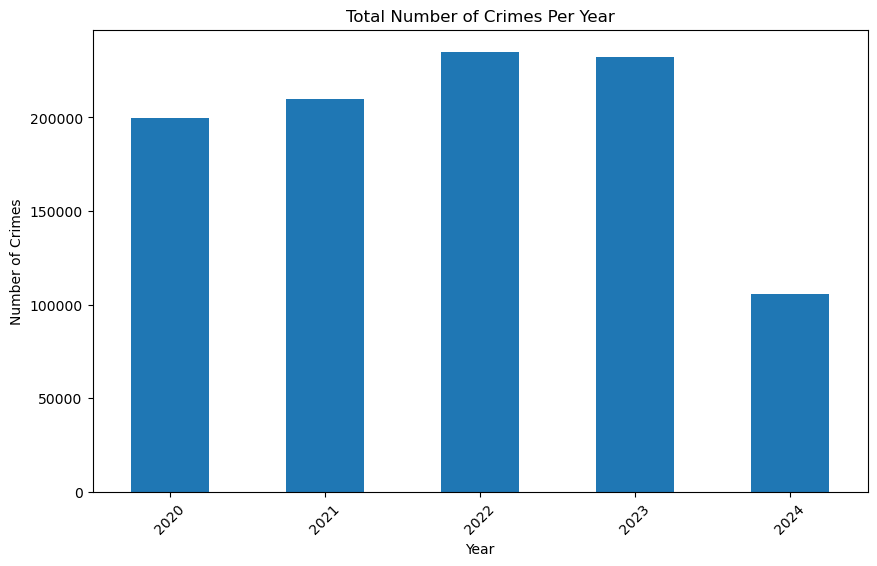

In [94]:
#datetime format
df['Date Occurred'] = pd.to_datetime(y)


df['Year'] = y.dt.year

# Group by year and count the number of crimes
crime_per_year = df.groupby('Year').size()

# Plotting 
plt.figure(figsize=(10, 6))
crime_per_year.plot(kind='bar')
plt.title('Total Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

In [95]:
df_copy = merged_df.copy()
df_copy['DATE OCC'] = pd.to_datetime(df_copy['DATE OCC'])
df_copy['Year'] = df_copy['DATE OCC'].dt.year
df_copy['Month'] = df_copy['DATE OCC'].dt.month
df_copy['Day'] = df_copy['DATE OCC'].dt.day
df_copy['DayOfWeek'] = df_copy['DATE OCC'].dt.dayofweek

### 2. Seasonal Crime Patterns

Box plot to visualize the average number of crimes per month over the years:

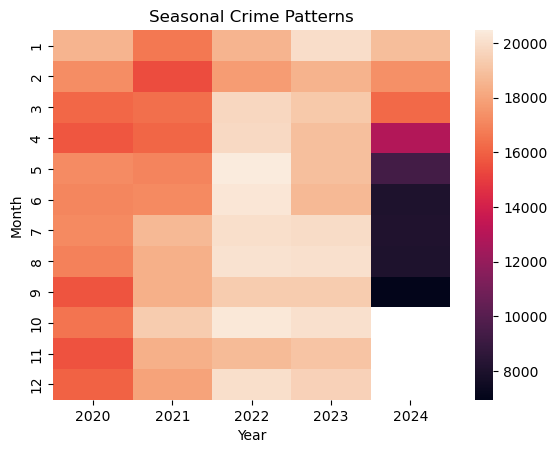

In [98]:
import seaborn as sns

monthly_crime_counts = df_copy.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')

sns.heatmap(monthly_crime_counts.pivot_table(index='Month', columns='Year', values='Crime Count'))
plt.title('Seasonal Crime Patterns')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

### 3. Most Common Crime Type

In [100]:
crime_type_counts = df1['Crm Cd Desc'].value_counts()

#Output the count of each crime type
print("Crime Type Occurrences:")
print(crime_type_counts)

#Find the crime type with the highest frequency
most_frequent_crime = crime_type_counts.idxmax()
highest_frequency = crime_type_counts.max()

# Output
print(f"The most frequent crime type is: {most_frequent_crime}")
print(f"Number of occurrences: {highest_frequency}")


Crime Type Occurrences:
Crm Cd Desc
VEHICLE - STOLEN                                           110739
BATTERY - SIMPLE ASSAULT                                    74332
BURGLARY FROM VEHICLE                                       61268
THEFT OF IDENTITY                                           60842
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     59579
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64
The most frequent crime type is: VEHICLE - STOLEN
Number of occurrences: 110739


### 4. Regional Differences in Crime Rates

Descriptive Statistics for Crime Rates by Region:
count       21.000000
mean     46684.523810
std       8502.045834
min      32481.000000
25%      40744.000000
50%      45715.000000
75%      49886.000000
max      67580.000000
dtype: float64


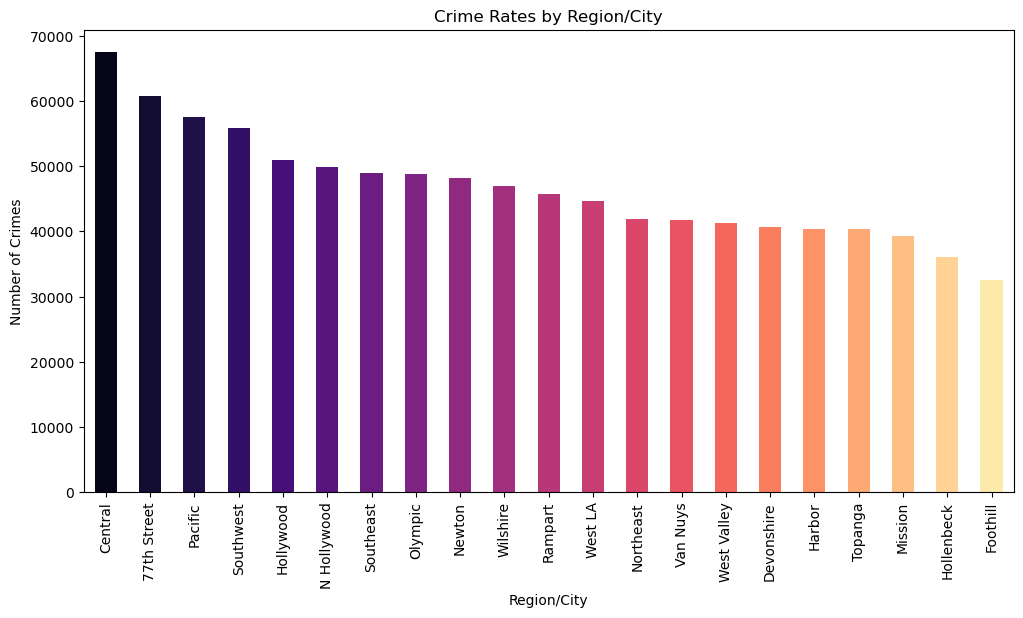

In [102]:
# Group the data by 'Area Name'
crime_by_region = df1.groupby('AREA NAME').size()
crime_by_region = crime_by_region.sort_values(ascending=False)
# Output descriptive statistics 
print("Descriptive Statistics for Crime Rates by Region:")
print(crime_by_region.describe())

colors = sns.color_palette('magma', len(crime_by_region))
plt.figure(figsize=(12, 6))
crime_by_region.plot(kind='bar', color=colors)
plt.title('Crime Rates by Region/City')
plt.xlabel('Region/City')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()



### 6. Days of the Week Analysis

Day of Week
Monday       138222
Tuesday      134639
Wednesday    139360
Thursday     138310
Friday       149835
Saturday     143755
Sunday       136254
dtype: int64


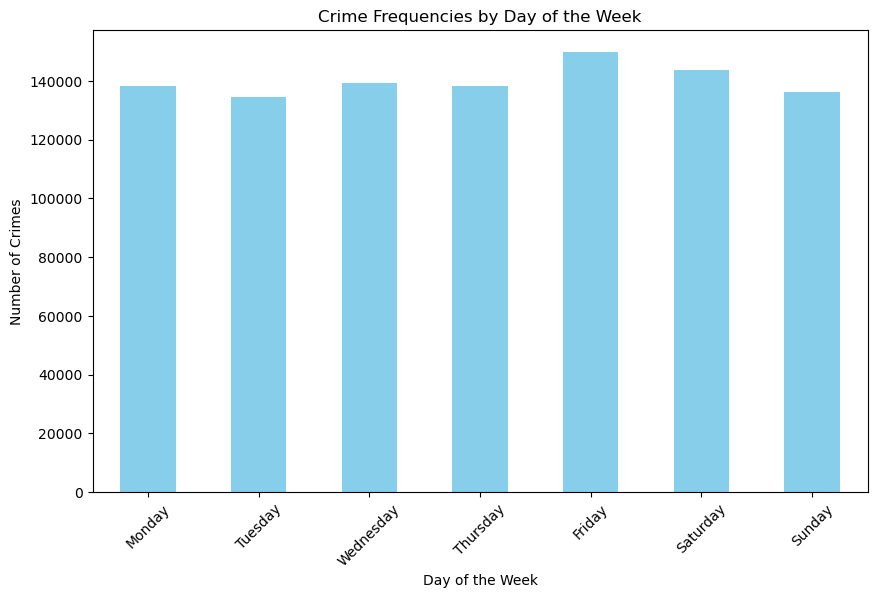

In [112]:

df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'])


df1['Day of Week'] = df1['DATE OCC'].dt.day_name()

# Group by day of the week and count occurrences
crime_by_day = df1.groupby('Day of Week').size()

# Sort the days of the week in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_by_day = crime_by_day.reindex(days_order)

# Output crime frequencies
print(crime_by_day)


plt.figure(figsize=(10, 6))
crime_by_day.plot(kind='bar', color='skyblue')
plt.title('Crime Frequencies by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

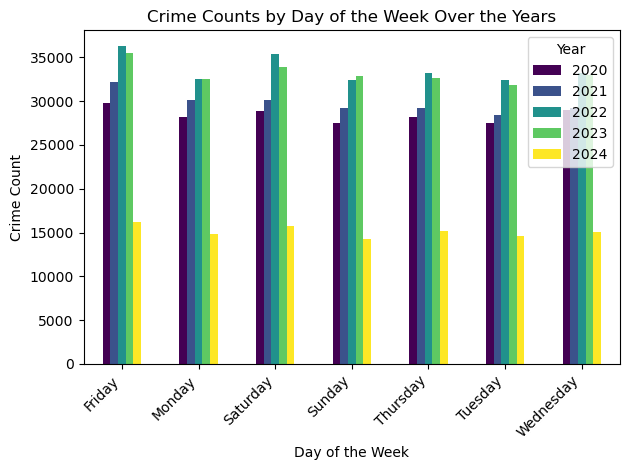

Total Crimes by Year:
YEAR
2020    198995
2021    208339
2022    235151
2023    232126
2024    105764
dtype: int64

Average Crimes per Year: 196075.0
Year with the Most Crimes: 2022
Year with the Fewest Crimes: 2024


In [138]:
# Crime per day analysis

df1['Date'] = pd.to_datetime(df1[['YEAR', 'MONTH', 'DAY']])
df1['YEAR'] = df1['YEAR'].astype(int)
df1['MONTH'] = df1['MONTH'].astype(int)
df1['DAY'] = df1['DAY'].astype(int)
df1['DayOfWeek'] = df1['Date'].dt.day_name() 
crime_counts_by_year_and_day = df1.groupby(['YEAR', 'DayOfWeek'])['Date'].count()
 
crime_counts_by_year_and_day = crime_counts_by_year_and_day.unstack('YEAR')
 
years = range(df1['YEAR'].min(), df1['YEAR'].max() + 1)
crime_counts_by_year_and_day = crime_counts_by_year_and_day[years]
 
total_crimes_by_year = crime_counts_by_year_and_day.sum()
average_crimes_per_year = total_crimes_by_year.mean()
max_crimes_year = total_crimes_by_year.idxmax()
min_crimes_year = total_crimes_by_year.idxmin()
 
plt.figure(figsize=(12, 6))
crime_counts_by_year_and_day.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(years))))
plt.title('Crime Counts by Day of the Week Over the Years') 
plt.xlabel('Day of the Week')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()
 
print("Total Crimes by Year:")
print(total_crimes_by_year)
print("\nAverage Crimes per Year:", average_crimes_per_year)
print("Year with the Most Crimes:", max_crimes_year)
print("Year with the Fewest Crimes:", min_crimes_year)

### 7. Impact of Major Events

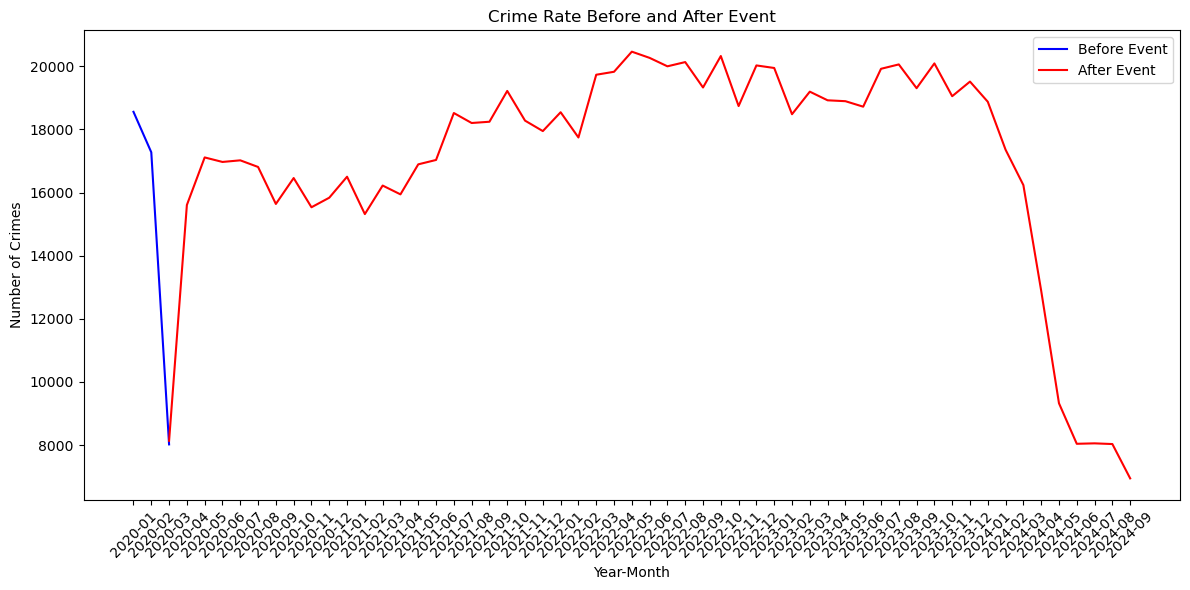

In [142]:

df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'])

# Define the event date (here, we are taking the covid lockdown start as an example, i.e. March 2024)
event_date = '2020-03-15'

# Split data into 'before' and 'after' the event
before_event = df1[df1['DATE OCC'] < event_date]
after_event = df1[df1['DATE OCC'] >= event_date]

# Group by year and month for before and after the event
crime_before = before_event.groupby(before_event['DATE OCC'].dt.to_period('M')).size()
crime_after = after_event.groupby(after_event['DATE OCC'].dt.to_period('M')).size()

# Plotting the before and after comparison
plt.figure(figsize=(12, 6))
plt.plot(crime_before.index.astype(str), crime_before, label='Before Event', color='blue')
plt.plot(crime_after.index.astype(str), crime_after, label='After Event', color='red')
plt.title('Crime Rate Before and After Event')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8. Outliers and Anomalies

Outliers in Victim Age:
Series([], Name: Vict Age, dtype: int64)


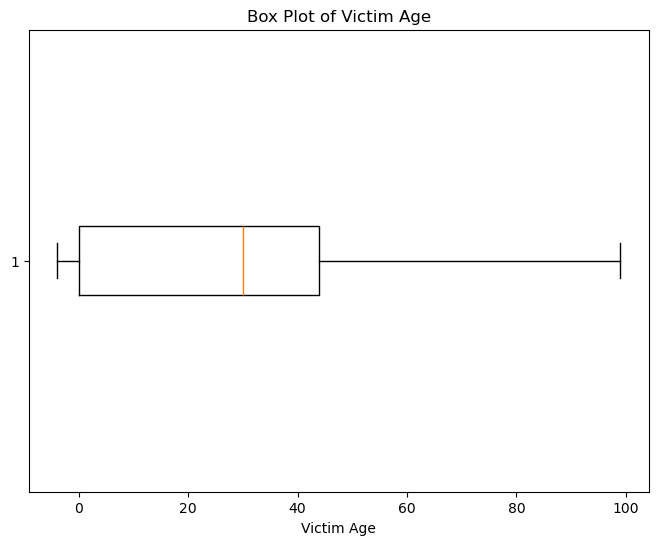

In [144]:
# Analyze Victim Age for outliers
age_data = df1['Vict Age'].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = age_data.quantile(0.25)
Q3 = age_data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = age_data[(age_data < lower_bound) | (age_data > upper_bound)]

print("Outliers in Victim Age:")
print(outliers)

# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(age_data, vert=False)
plt.title('Box Plot of Victim Age')
plt.xlabel('Victim Age')
plt.show()

C:\Users\megha\AppData\Local\Temp\ipykernel_14916\3906722133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Crm Cd Desc',data=df1,order=df1['Crm Cd Desc'].value_counts().head(5).index,palette='magma')


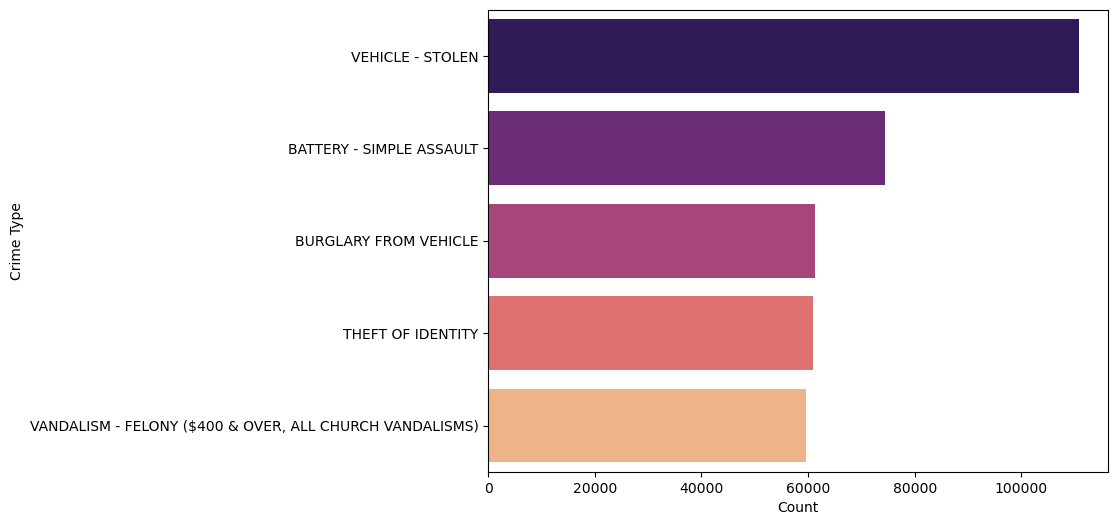

In [146]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Crm Cd Desc',data=df1,order=df1['Crm Cd Desc'].value_counts().head(5).index,palette='magma')
colors = sns.color_palette("Set2", 3)  # You can choose any palette or number of colors
# sns.countplot(y='Crm Cd Desc', data=df1, order=df['Crm Cd Desc'].value_counts().head(5).index, hue='Crm Cd Desc', palette=colors, legend=False)
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

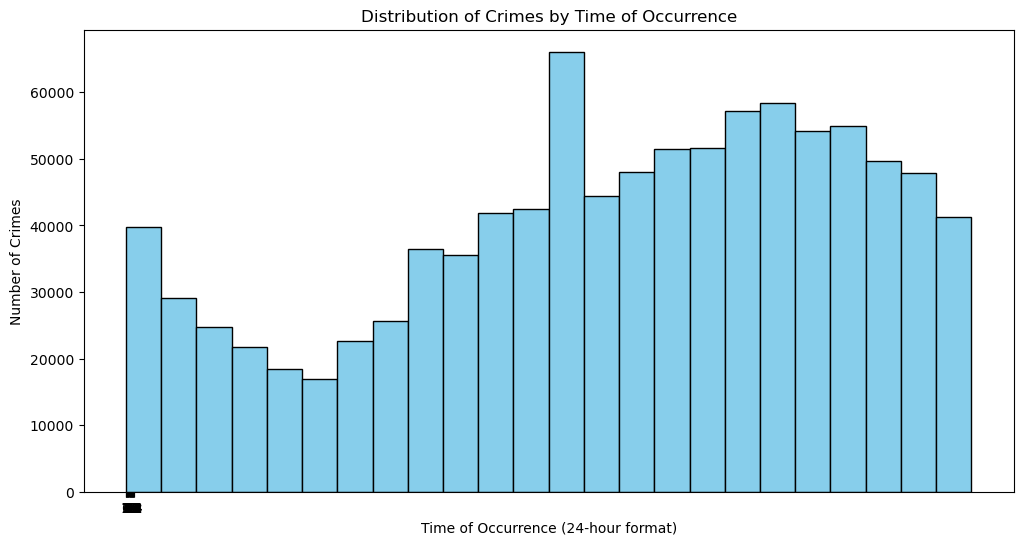

In [148]:
# Histogram for TIME OCC
plt.figure(figsize=(12, 6))
plt.hist(df1['TIME OCC'], bins=24, color='skyblue', edgecolor='black')
plt.title('Distribution of Crimes by Time of Occurrence')
plt.xlabel('Time of Occurrence (24-hour format)')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 25, 1))
plt.show()


### 9. Demographic Factors

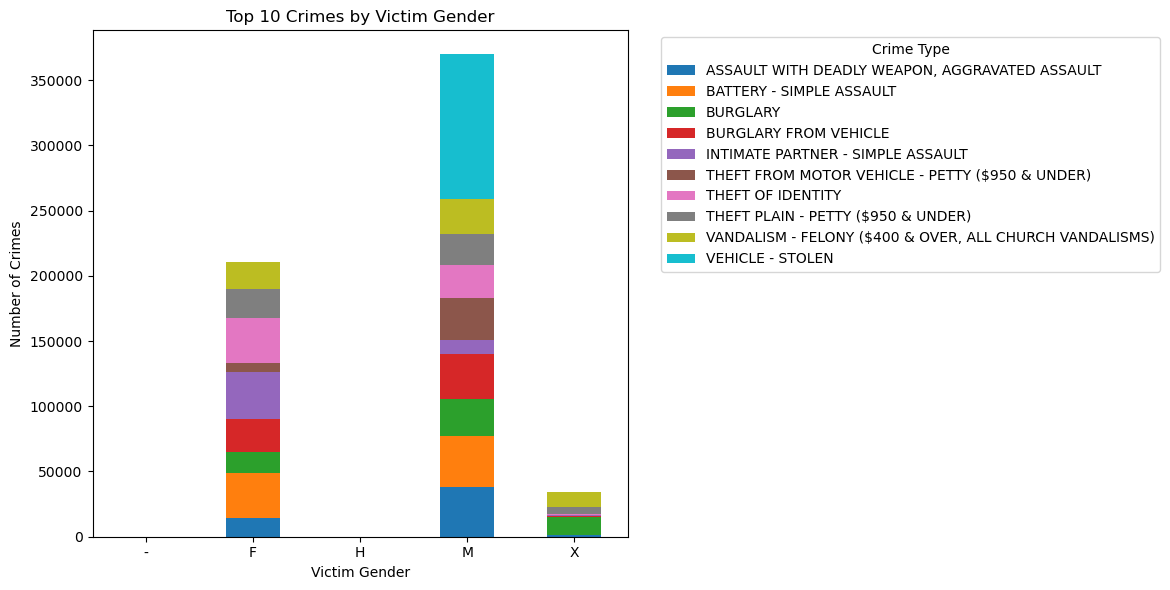

In [150]:
#based on gender
# Get the top 10 crimes based on frequency
top_crimes = df1['Crm Cd Desc'].value_counts().head(10).index.tolist()

filtered_data = df1[df1['Crm Cd Desc'].isin(top_crimes)]

age_crime = filtered_data.groupby(['Vict Age', 'Crm Cd Desc']).size().unstack(fill_value=0)


# Group by Victim Gender and Crime Type
gender_crime = filtered_data.groupby(['Vict Sex', 'Crm Cd Desc']).size().unstack(fill_value=0)

# Bar plot for Gender vs Top 10 Crime Types
gender_crime.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 10 Crimes by Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [151]:
groups = [
    (df1['Vict Age'] <= 12),
    (df1['Vict Age'] >= 13) & (df1['Vict Age'] < 18),
    (df1['Vict Age'] >= 18) & (df1['Vict Age'] < 65),
    (df1['Vict Age'] >= 65)]
 
labels = ['Child', 'Teen', 'Adult', 'Old']
 
# create new column 'Age Group'
df1['Age Group'] = np.select(groups, labels)

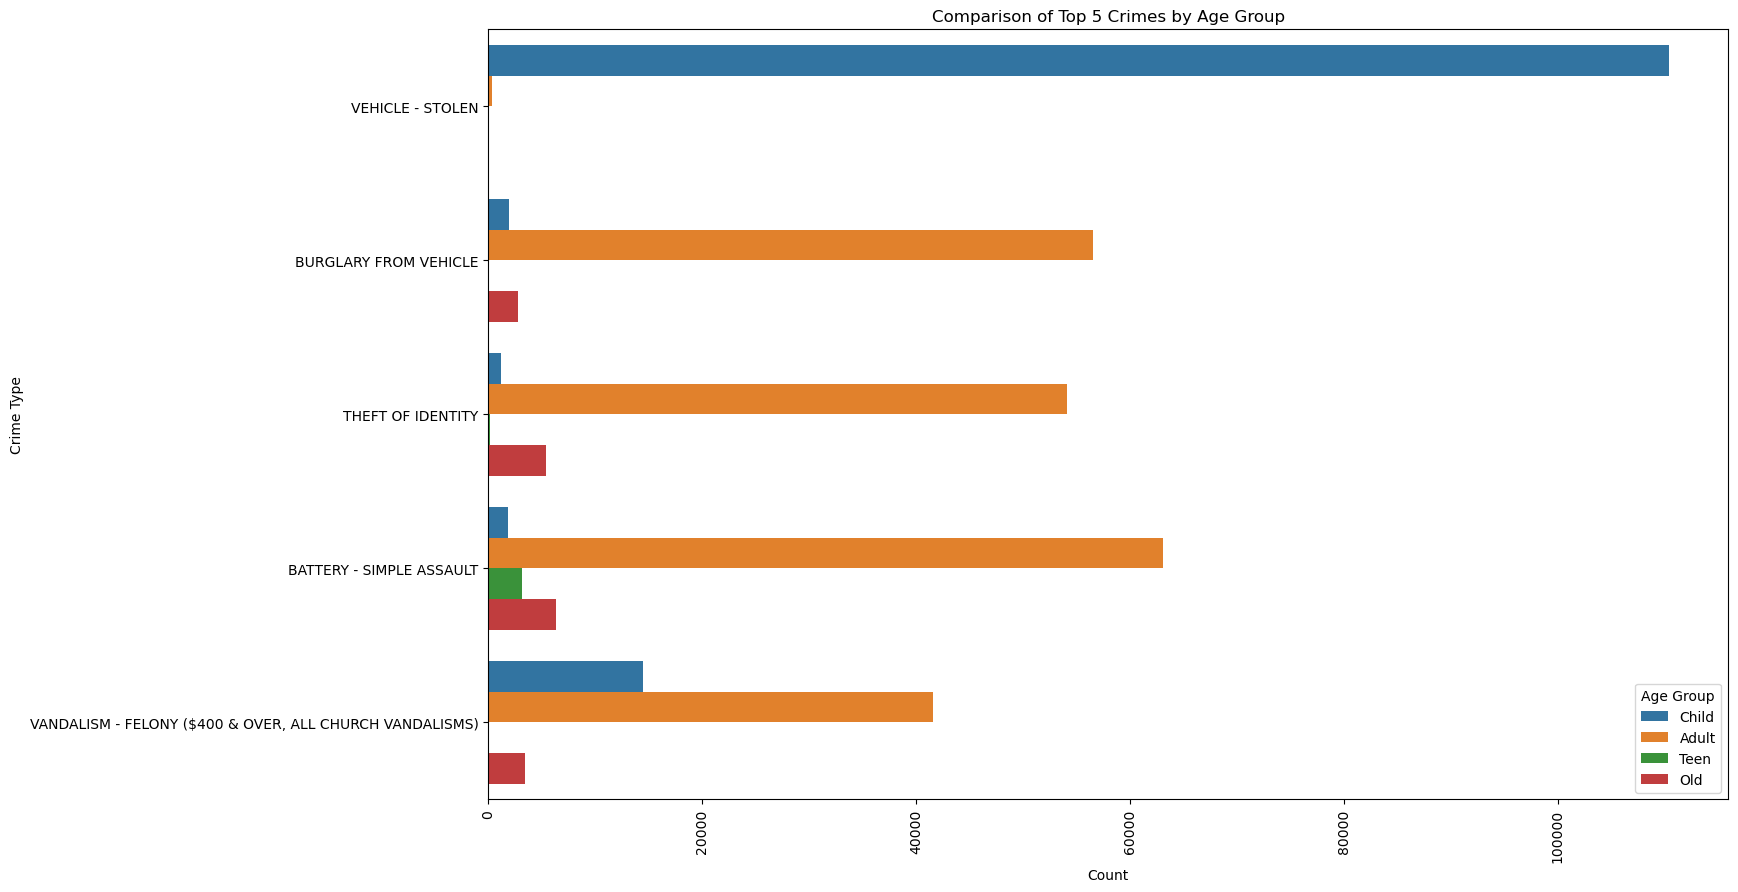

In [153]:
# analysis on top 5 crimes by victim age group

top_5_crime_types = df1['Crm Cd Desc'].value_counts().head(5).index
filtered_df = df1[df1['Crm Cd Desc'].isin(top_5_crime_types)]
plt.figure(figsize=(16, 10))
sns.countplot(y='Crm Cd Desc', data=filtered_df, hue='Age Group')
plt.title('Comparison of Top 5 Crimes by Age Group')
plt.ylabel('Crime Type')
plt.xlabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Age Group')
plt.show()

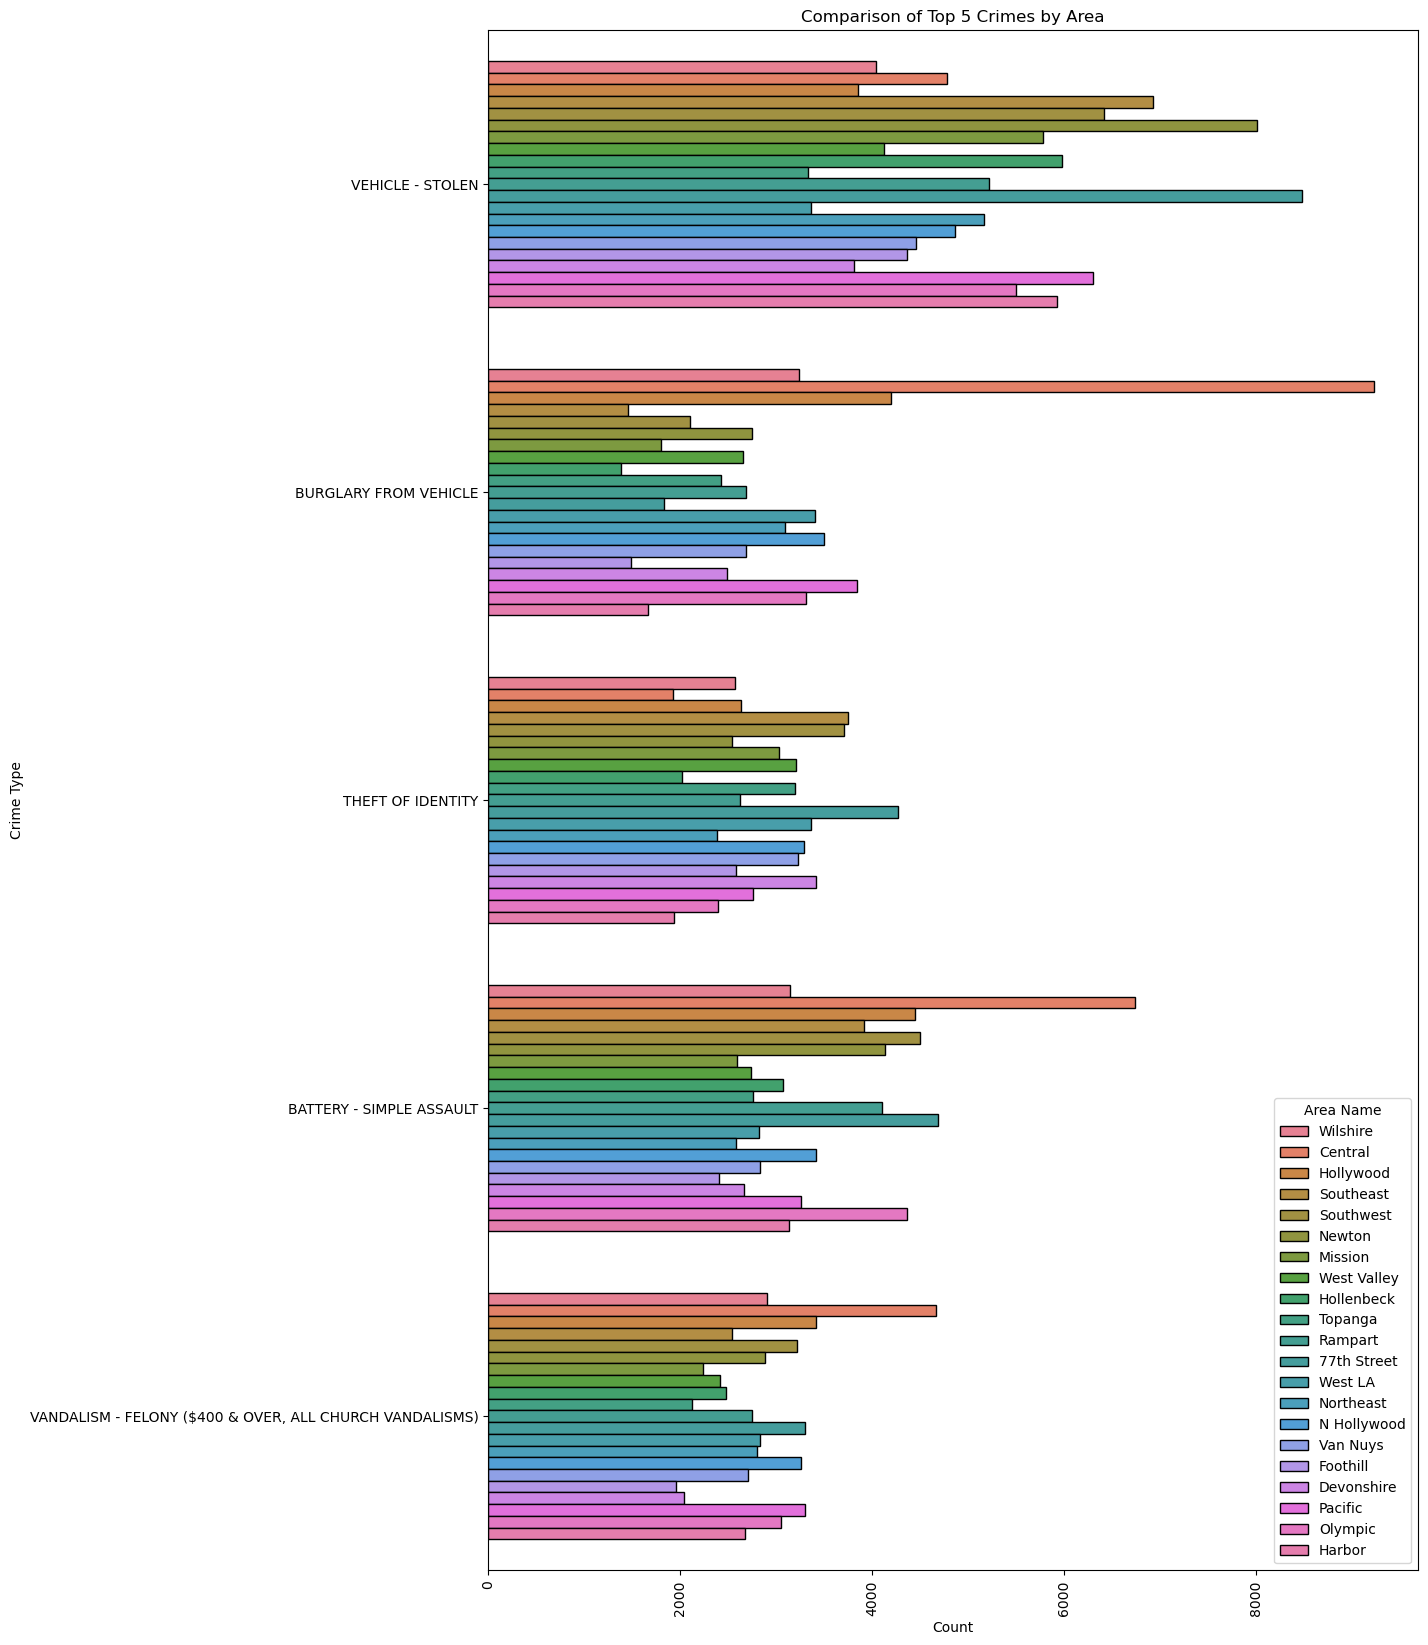

In [155]:
#analysis of top 5 crimes based on area
top_5_crime_types = df1['Crm Cd Desc'].value_counts().head(5).index
filtered_df = df1[df1['Crm Cd Desc'].isin(top_5_crime_types)]
plt.figure(figsize=(12, 20))
sns.countplot(y='Crm Cd Desc', data=filtered_df, hue='AREA NAME', edgecolor='black')
plt.title('Comparison of Top 5 Crimes by Area')
plt.ylabel('Crime Type')
plt.xlabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Area Name')
plt.show()

### 10. Predicting Future Trends

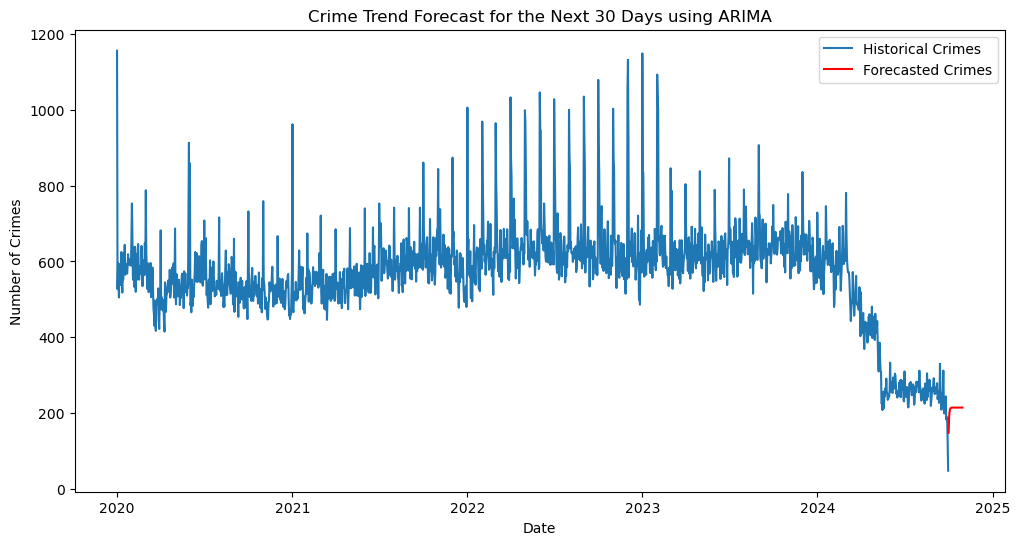

In [158]:
import statsmodels.api as sm
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Aggregate by day, counting occurrences of crimes
daily_crimes = df.groupby(df['DATE OCC'].dt.date).size()
#daily_crimes.index = pd.to_datetime(daily_crimes.index)
daily_crimes.index = pd.to_datetime(daily_crimes.index).to_period('D').to_timestamp()


# Fit ARIMA model
model = sm.tsa.ARIMA(daily_crimes, order=(1, 1, 1))  # Adjust order as necessary
model_fit = model.fit()

# Forecast for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(daily_crimes, label='Historical Crimes')
plt.plot(forecast, label='Forecasted Crimes', color='red')
plt.title('Crime Trend Forecast for the Next 30 Days using ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()


### 5. Correlation with Economic Factors

In [161]:
#loading dataset from (https://fred.stlouisfed.org/series/GDP)
df_economic = pd.read_csv("GDP.csv")
df_economic.isnull().sum()

DATE    0
GDP     0
dtype: int64

In [162]:
#Filtering the data to have years specific to crime
df_economic['DATE'] = pd.to_datetime(df_economic['DATE'])
df_economic = df_economic[df_economic['DATE'] >= '2020-01-01']
df_economic = df_economic.reset_index(drop=True)
df_economic.to_csv('filtered_data.csv', index=False)

In [163]:
#checking filtered data
filtered = pd.read_csv('filtered_data.csv')
filtered['DATE'].head()

0    2020-01-01
1    2020-04-01
2    2020-07-01
3    2020-10-01
4    2021-01-01
Name: DATE, dtype: object

In [164]:
#converting the data to datetime datatype
filtered['DATE'] = pd.to_datetime(filtered['DATE']) 
filtered['YEAR'] = filtered['DATE'].dt.year
filtered['MONTH'] = filtered['DATE'].dt.month

In [165]:
filtered.head(5)

,DATE,GDP,YEAR,MONTH
0,2020-01-01,21727.657,2020,1
1,2020-04-01,19935.444,2020,4
2,2020-07-01,21684.551,2020,7
3,2020-10-01,22068.767,2020,10
4,2021-01-01,22656.793,2021,1


In [166]:
#Converting the dates to date format
df1['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df1['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df1['YEAR'] = df['DATE OCC'].dt.year
df1['MONTH'] = df['DATE OCC'].dt.month
df1['DAY'] = df['DATE OCC'].dt.day

In [167]:
#merging the data
data = pd.merge(df1, filtered, on=['YEAR','MONTH'], how='inner')
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LON,Day of Week,YEAR,MONTH,DAY,Date,DayOfWeek,Age Group,DATE,GDP
0,230110144,2023-04-04,2020-07-03,900,1,Central,182,2,354,THEFT OF IDENTITY,...,-118,Friday,2020,7,3,2020-07-03,Friday,Adult,2020-07-01,21684.551
1,221804943,2022-01-21,2020-07-01,1335,18,Southeast,1822,2,354,THEFT OF IDENTITY,...,-118,Wednesday,2020,7,1,2020-07-01,Wednesday,Adult,2020-07-01,21684.551
2,221908151,2022-04-12,2020-10-01,1,19,Mission,1988,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,-118,Thursday,2020,10,1,2020-10-01,Thursday,Child,2020-10-01,22068.767
3,231805781,2023-02-03,2020-07-01,805,18,Southeast,1802,2,354,THEFT OF IDENTITY,...,-118,Wednesday,2020,7,1,2020-07-01,Wednesday,Adult,2020-07-01,21684.551
4,231322474,2023-12-24,2020-01-09,1200,13,Newton,1354,2,354,THEFT OF IDENTITY,...,-118,Thursday,2020,1,9,2020-01-09,Thursday,Adult,2020-01-01,21727.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327192,241605414,2024-02-16,2024-01-19,1415,16,Foothill,1619,2,354,THEFT OF IDENTITY,...,-118,Friday,2024,1,19,2024-01-19,Friday,Adult,2024-01-01,28624.069
327193,241604405,2024-01-14,2024-01-13,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,-118,Saturday,2024,1,13,2024-01-13,Saturday,Adult,2024-01-01,28624.069
327194,242004546,2024-01-16,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,-118,Tuesday,2024,1,16,2024-01-16,Tuesday,Old,2024-01-01,28624.069
327195,240104953,2024-01-15,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,-118,Monday,2024,1,15,2024-01-15,Monday,Child,2024-01-01,28624.069


In [168]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Day of Week', 'YEAR', 'MONTH', 'DAY', 'Date', 'DayOfWeek',
       'Age Group', 'DATE', 'GDP'],
      dtype='object')

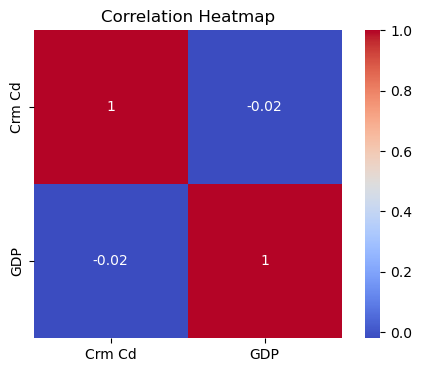

In [169]:
columns_to_correlate = ['Crm Cd', 'GDP']
correlation_matrix = data[columns_to_correlate].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

We observe a negative correlation here, which suggests that as GDP increases, crime rates tend to decrease